# Model #1 No Tranformation

1) Delivery_time -> Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('delivery_time.csv')

In [3]:
df = df.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'})

In [4]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.shape

(21, 2)

In [6]:
df[df.duplicated()].shape

(0, 2)

# Check for Duplicate Values

In [7]:
df[df.duplicated()] # No Duplicate Records

,Delivery_Time,Sorting_Time


# Check for Outliers

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

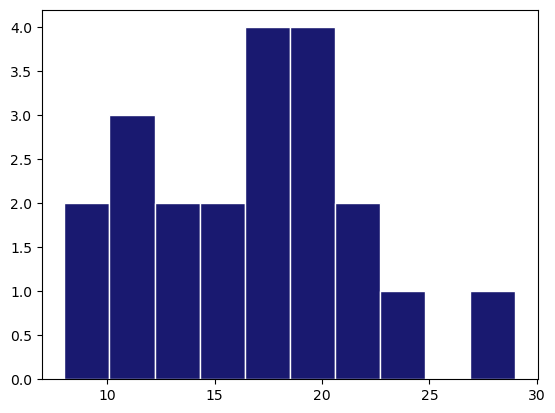

In [8]:
plt.hist(df['Delivery_Time'],color='midnightblue',edgecolor='w') 

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

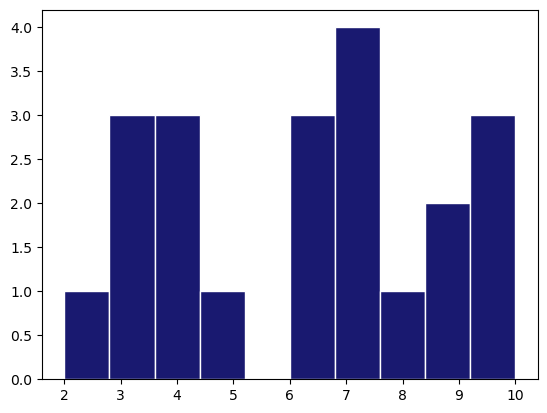

In [9]:
plt.hist(df['Sorting_Time'],color='midnightblue',edgecolor='w') 

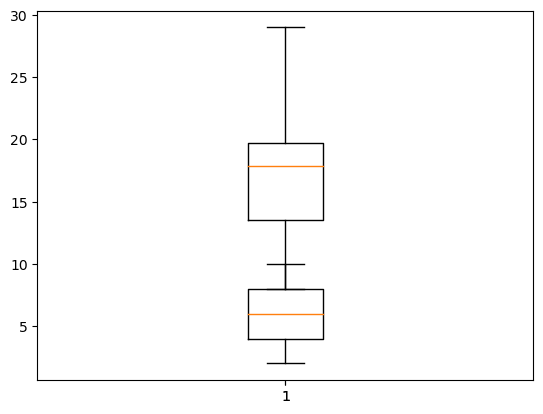

In [10]:
data_box=df.dropna()
data_box1=data_box.Delivery_Time
data_box2=data_box.Sorting_Time
plt.boxplot(data_box1)
plt.boxplot(data_box2)
plt.show()

In [11]:
df["Delivery_Time"].describe() #No Outliers Present

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_Time, dtype: float64

In [12]:
df["Sorting_Time"].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_Time, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['Sorting_Time']], df['Delivery_Time'], test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([24.9247435 , 18.85200984, 12.77927618, 12.77927618, 24.9247435 ])

In [17]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [2.02424455]
Intercept: 4.682297962052008


In [18]:
df=pd.DataFrame()
df['actual']=y_test
df['Predicted']=y_pred
df.reset_index(drop=True,inplace =True)

In [19]:
df

,actual,Predicted
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


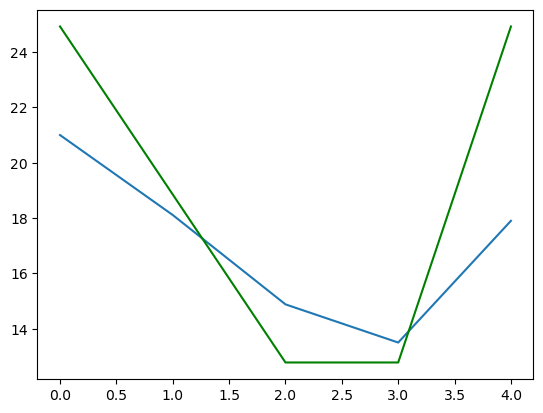

In [20]:
plt.plot(df['actual'])
plt.plot(df['Predicted'],c='g')

In [21]:
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
r2_score(y_pred,y_test)*100

52.387930790935975

In [24]:
mean_squared_error(y_pred,y_test)

14.046738956635016

In [25]:
model.intercept_

4.682297962052008

In [26]:
model.coef_

array([2.02424455])

# Model #2 Lograthmic Tranformation

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [68]:
df=pd.read_csv('delivery_time.csv')

In [69]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [71]:
df=df.rename(columns={'Delivery Time' :'Delivery_Time','Sorting Time' :'Sorting_Time'})

In [72]:
df['log_Sorting_Time']=np.log(df['Sorting_Time'])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df[['log_Sorting_Time']], df['Delivery_Time'], test_size=0.2, random_state=42)

In [79]:
model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred=model2.predict(X_test)

In [81]:
y_pred

array([22.92713014, 19.32631235, 13.6767019 , 13.6767019 , 22.92713014])

In [82]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [2.02424455]
Intercept: 4.682297962052008


In [84]:
df=pd.DataFrame()
df['actual']=y_test
df['Predict']=y_pred
df.reset_index(drop=True,inplace =True)

In [85]:
df

,actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


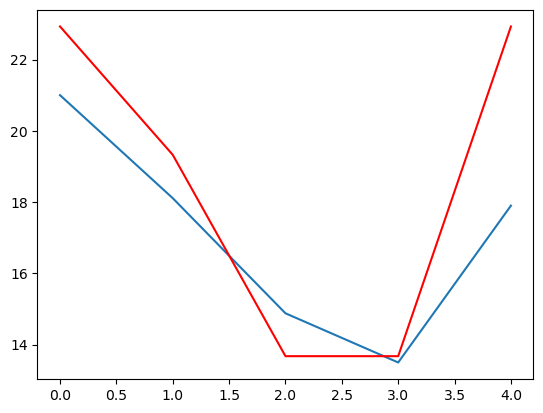

In [89]:
plt.plot(df['actual'])
plt.plot(df['Predict'],c='r')

In [87]:
from sklearn.metrics import r2_score,mean_squared_error

In [88]:
r2_score(y_pred,y_test)*100

63.03152590799439

# Model #3 Sqrt Tranformation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('delivery_time.csv')

In [5]:
df=df.rename(columns={'Delivery Time' :'Delivery_Time','Sorting Time' :'Sorting_Time'})

In [6]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
df['sqrt_Sorting_Time']=np.sqrt(df['Sorting_Time'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['sqrt_Sorting_Time']], df['Delivery_Time'], test_size=0.2, random_state=42)

In [11]:
model3=LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred=model3.predict(X_test)
y_pred

array([23.93954967, 19.14378479, 13.14821174, 13.14821174, 23.93954967])

In [14]:
y_test

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery_Time, dtype: float64

In [13]:
print('Coefficient:', model3.coef_)
print('Intercept:', model3.intercept_)

Coefficient: [9.28464713]
Intercept: -5.421082515654305


In [17]:
df=pd.DataFrame()
df['Actual']=y_test
df['Prediction']=y_pred
df.reset_index(inplace=True,drop=True)

In [18]:
df

,Actual,Prediction
0,21.00,23.939550
1,18.11,19.143785
2,14.88,13.148212
3,13.50,13.148212
4,17.90,23.939550


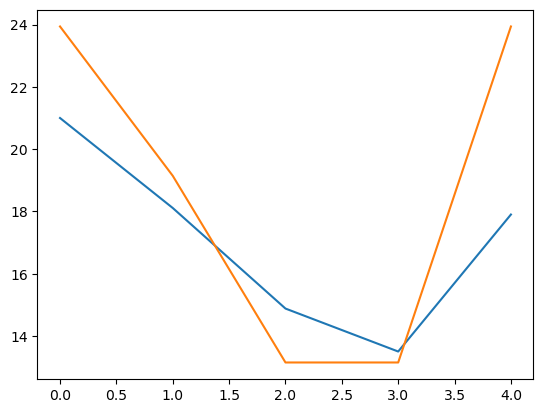

In [20]:
plt.plot(df['Actual'])
plt.plot(df['Prediction'])

In [21]:
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
r2_score(y_pred,y_test)*100

57.76229536496375

# Model #4 Exponential Tranformation

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv('delivery_time.csv')

In [46]:
df=df.rename(columns={'Delivery Time' :'Delivery_Time','Sorting Time' :'Sorting_Time'})

In [47]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [48]:
df['exp_Sorting_Time']=np.exp(df['Sorting_Time'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[['exp_Sorting_Time']],df['Delivery_Time'],test_size=0.2,random_state=42)

In [50]:
model4=LinearRegression()
model4.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred=model4.predict(X_test)
y_pred

array([30.53329306, 15.41760196, 14.66503602, 14.66503602, 30.53329306])

In [52]:
y_test

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery_Time, dtype: float64

In [53]:
df=pd.DataFrame()
df['Actual']=y_test
df['Prediction']=y_pred
df.reset_index(inplace=True,drop=True)

In [54]:
df

,Actual,Prediction
0,21.00,30.533293
1,18.11,15.417602
2,14.88,14.665036
3,13.50,14.665036
4,17.90,30.533293


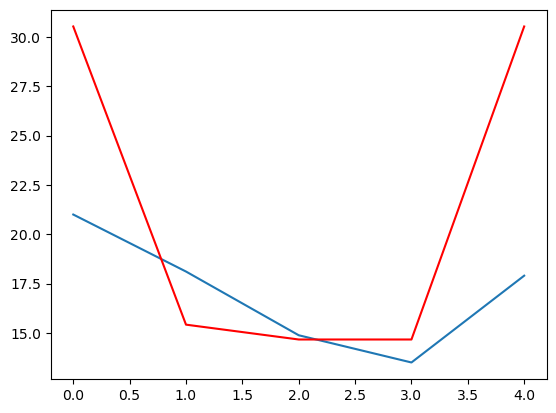

In [55]:
plt.plot(df['Actual'])
plt.plot(df['Prediction'],c='r')

In [56]:
from sklearn.metrics import r2_score,mean_squared_error

In [57]:
r2_score(y_pred,y_test)*100

11.576124468179072

# Result